In [6]:
import os
import sys
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy import stats

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer

warnings.simplefilter('ignore')

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [21]:
dataset = pd.read_csv('PGA_Data_Historical.csv')

df = dataset.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()
df1 = df[["Player Name", "Season","SG: Putting - (TOTAL SG:PUTTING)"]]
df_1 = df[["Player Name", "Season"]]

df1.head()

Variable,Player Name,Season,SG: Putting - (TOTAL SG:PUTTING)
0,Aaron Baddeley,2010,44.202
1,Aaron Baddeley,2011,20.08
2,Aaron Baddeley,2012,33.197
3,Aaron Baddeley,2013,NaN
4,Aaron Goldberg,2010,NaN


In [9]:
len(df1)

5051

In [17]:
df1.count()

Variable
Player Name                         5051
Season                              5051
SG: Putting - (TOTAL SG:PUTTING)     569
dtype: int64

In [18]:
df['SG: Putting - (TOTAL SG:PUTTING)'].count()

569

### Replace Null Values with Mean

In [19]:
df_2 = df[["Accuracy Rating - (RATING)","Scoring Rating - (RATING)","Power Rating - (RATING)", "Putting Rating - (RATING)", "Short Game Rating - (RATING)"]]

df_2.isnull()

Variable,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
5046,True,True,True,True,True
5047,True,True,True,True,True
5048,True,True,True,True,True
5049,True,True,True,True,True


### Merge Data

In [22]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_2 = pd.DataFrame(imp_mean.fit_transform(df_2),columns=["Accuracy Rating - (RATING)","Scoring Rating - (RATING)","Power Rating - (RATING)", "Putting Rating - (RATING)", "Short Game Rating - (RATING)"])

df_row_merged = pd.concat([df_1, df_2], axis=1)

### Start Labeling

In [23]:
#2010 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Anthony Kim') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'K.J. Choi') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Fred Couples') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Nick Watney') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)

In [24]:
#2011 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charl Schwartzel') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Luke Donald') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Geoff Ogilvy') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Angel Cabrera') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)

In [25]:
#2012 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Louis Oosthuizen') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Peter Hanson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)

In [26]:
#2013 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Angel Cabrera') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Marc Leishman') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thorbjorn Olesen') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Brandt Snedeker') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)

In [27]:
#2014 Top Performaers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jonas Blixt') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jonas Blixt') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Miguel Angel Jimenez') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rickie Fowler') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)

In [28]:
#2015 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hideki Matsuyama') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ian Poulter') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)

In [29]:
#2016 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Danny Willett') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'J.B. Holmes') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hideki Matsuyama') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bernhard Langer') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Smylie Kaufman') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)

In [30]:
#2017 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Sergio Garcia') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charl Schwartzel') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thomas Pieters') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rickie Fowler') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)

In [31]:
#2018 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Patrick Reed') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rickie Fowler') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jon Rahm') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Cameron Smith') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Henrik Stenson') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)

In [32]:
#2019 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Brooks Koepka') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Xander Schauffele') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tony Finau') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Francesco Molinari') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Web Simpson') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Patrick Cantlay') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ricky Fowler') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'John Rahm') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)

In [33]:
df_na= df_row_merged.fillna(0)

In [34]:
df_masters = df_na.drop(columns=['Player Name', 'Season'])

In [35]:
y = df_masters["Label"].values
X = df_masters.loc[ : ,df_masters.columns != 'Label']

In [36]:
X.corr(method='spearman', min_periods=1)

,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING)
Accuracy Rating - (RATING),1.000000,0.400185,-0.009452,-0.137988,0.094839
Scoring Rating - (RATING),0.400185,1.000000,0.192337,0.247150,0.247227
Power Rating - (RATING),-0.009452,0.192337,1.000000,-0.090387,-0.107848
Putting Rating - (RATING),-0.137988,0.247150,-0.090387,1.000000,0.184056
Short Game Rating - (RATING),0.094839,0.247227,-0.107848,0.184056,1.000000


### Split Data for Training and Testing

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

### Create and Fit Model

In [38]:
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Score the Model

In [39]:
print(f"Training data score: {classifier.score(X_train, y_train)}")
print(f"Test data score: {classifier.score(X_test, y_test.tolist())}")

Training data score: 0.9939281942977825
Test data score: 0.9960411718131433


### Make 10 Predictions

In [40]:
predictions = classifier.predict(X_test)

print(f"First 10 predictions: {predictions[:10]}")
print(f"First 10 predictions: {y_test[:10].tolist()}")

# pd.DataFrame({"predictions": predictions, "Actual": y_test}).reset.index

First 10 predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 10 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Predict testing Data

In [41]:
results = pd.DataFrame({"predictions": predictions, "Actual": y_test})

In [42]:
conf_matrix = metrics.confusion_matrix(y_test, predictions)

conf_matrix

array([[1258,    0],
       [   5,    0]], dtype=int64)

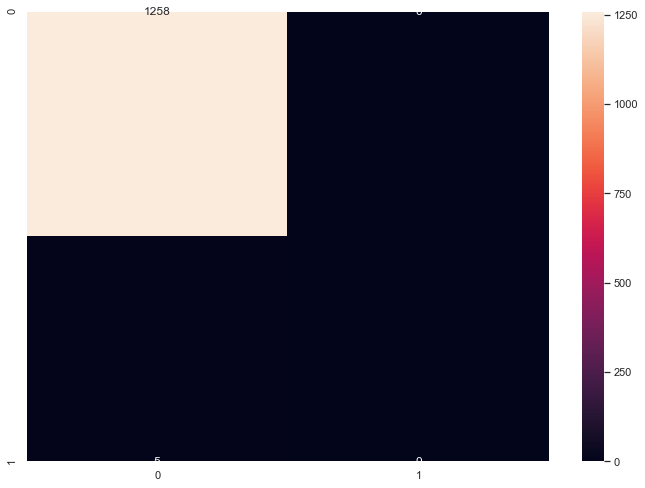

In [43]:
sns.heatmap(conf_matrix, annot=True,fmt='d')

plt.show()

In [44]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1258
         1.0       0.00      0.00      0.00         5

    accuracy                           1.00      1263
   macro avg       0.50      0.50      0.50      1263
weighted avg       0.99      1.00      0.99      1263



In [45]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X, y)

0.9986141358146902

In [46]:
importances = rf.feature_importances_
importances

array([0.17500543, 0.15548854, 0.30466649, 0.16782304, 0.1970165 ])